In [7]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

In [8]:
#load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
df.drop('id', axis=1, inplace=True)

In [10]:
#data preprocessing
df.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [12]:
df['age'].astype(int)

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int32

In [13]:
#check null value
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
#replace the missing values with frequent value
df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)

In [17]:
#check values and count in the colums

print(df['work_type'].value_counts())
print(df['ever_married'].value_counts())
print(df['Residence_type'].value_counts())
print(df['gender'].value_counts())
print(df['smoking_status'].value_counts())

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [21]:
#Replacing the values in the columns with numerical values

df['gender'].replace({'Male':0, 'Female':1, 'Other':2}, inplace=True)
df.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,0,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,0,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,1,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,1,59.0,0,0,Yes,Private,Rural,76.15,28.7,Unknown,1
9,1,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [23]:
df['Residence_type'].replace({'Urban':0, 'Rural':1,}, inplace=True)
df.head(20)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,0,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,Yes,Self-employed,1,202.21,28.7,never smoked,1
2,0,80.0,0,1,Yes,Private,1,105.92,32.5,never smoked,1
3,1,49.0,0,0,Yes,Private,0,171.23,34.4,smokes,1
4,1,79.0,1,0,Yes,Self-employed,1,174.12,24.0,never smoked,1
5,0,81.0,0,0,Yes,Private,0,186.21,29.0,formerly smoked,1
6,0,74.0,1,1,Yes,Private,1,70.09,27.4,never smoked,1
7,1,69.0,0,0,No,Private,0,94.39,22.8,never smoked,1
8,1,59.0,0,0,Yes,Private,1,76.15,28.7,Unknown,1
9,1,78.0,0,0,Yes,Private,0,58.57,24.2,Unknown,1


In [25]:
df['ever_married'].replace({'Yes':0, 'No':1,}, inplace=True)
df.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,Private,0,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,0,Self-employed,1,202.21,28.7,never smoked,1
2,0,80.0,0,1,0,Private,1,105.92,32.5,never smoked,1
3,1,49.0,0,0,0,Private,0,171.23,34.4,smokes,1
4,1,79.0,1,0,0,Self-employed,1,174.12,24.0,never smoked,1
5,0,81.0,0,0,0,Private,0,186.21,29.0,formerly smoked,1
6,0,74.0,1,1,0,Private,1,70.09,27.4,never smoked,1
7,1,69.0,0,0,1,Private,0,94.39,22.8,never smoked,1
8,1,59.0,0,0,0,Private,1,76.15,28.7,Unknown,1
9,1,78.0,0,0,0,Private,0,58.57,24.2,Unknown,1


In [36]:
df['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job': 3, 'Never_worked':4}, inplace=True)
df.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,1,61.0,0,0,0,1,1,202.21,28.7,1,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0,1
6,0,74.0,1,1,0,0,1,70.09,27.4,1,1
7,1,69.0,0,0,1,0,0,94.39,22.8,1,1
8,1,59.0,0,0,0,0,1,76.15,28.7,0,1
9,1,78.0,0,0,0,0,0,58.57,24.2,0,1


In [30]:
df['smoking_status'].replace({'formerly smoked':1, 'never smoked':2, 'smokes':3, 'Unknown':0}, inplace=True)
df.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,1,61.0,0,0,0,1,1,202.21,28.7,1,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0,1
6,0,74.0,1,1,0,0,1,70.09,27.4,1,1
7,1,69.0,0,0,1,0,0,94.39,22.8,1,1
8,1,59.0,0,0,0,0,1,76.15,28.7,0,1
9,1,78.0,0,0,0,0,0,58.57,24.2,0,1


<Axes: >

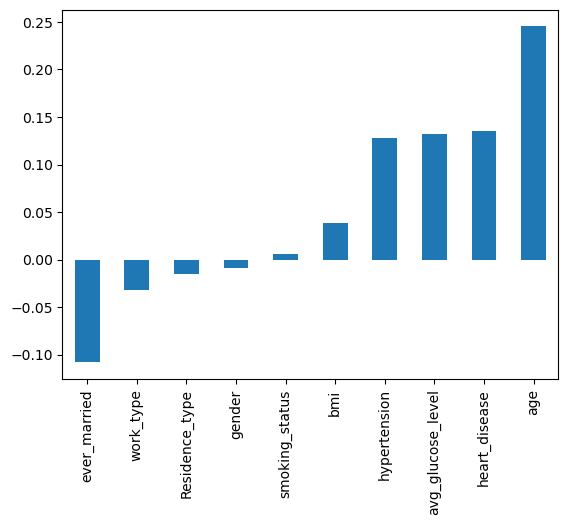

In [37]:
#Exploratory Data Analysis

#Find correction between the variable

df.corr()['stroke'][:-1].sort_values().plot(kind='bar')

<Axes: >

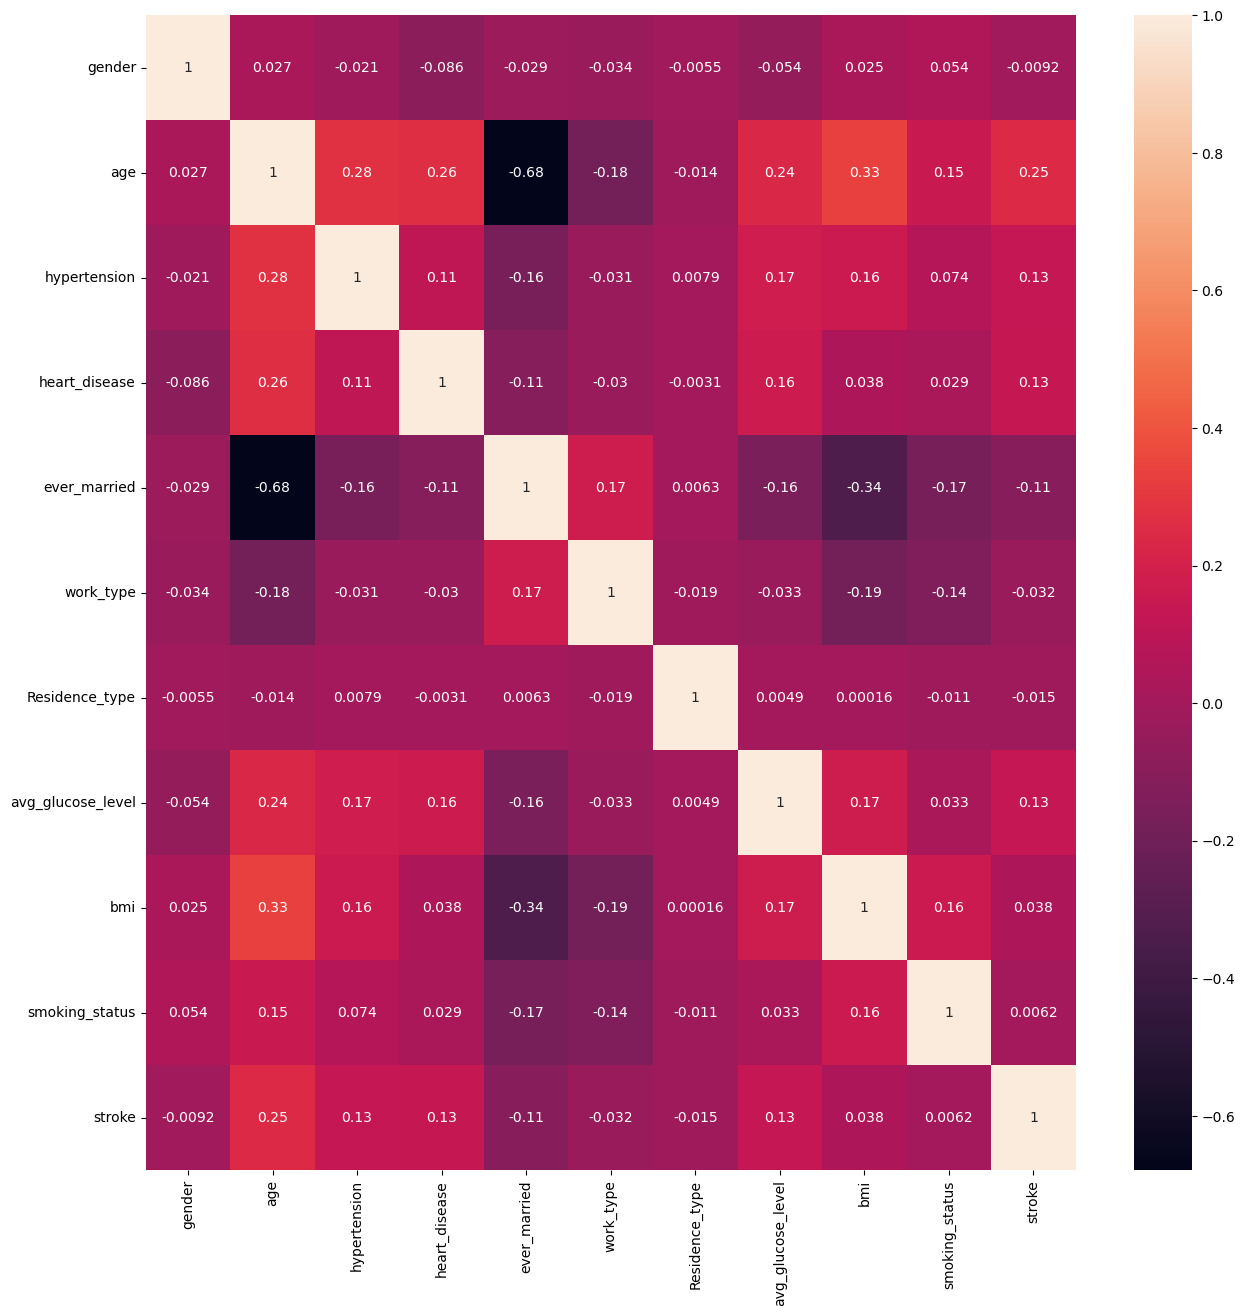

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [45]:
#replace age with number wrt to age group
df['age'] = pd.cut(x=df['age'], bins=[0, 12, 19, 30, 60, 100], labels=[0, 1, 2, 3,4])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,4,0,1,0,0,0,228.69,36.6,0,1
1,1,4,0,0,0,1,1,202.21,28.7,1,1
2,0,4,0,1,0,0,1,105.92,32.5,1,1
3,1,3,0,0,0,0,0,171.23,34.4,2,1
4,1,4,1,0,0,1,1,174.12,24.0,1,1


<Axes: xlabel='gender', ylabel='count'>

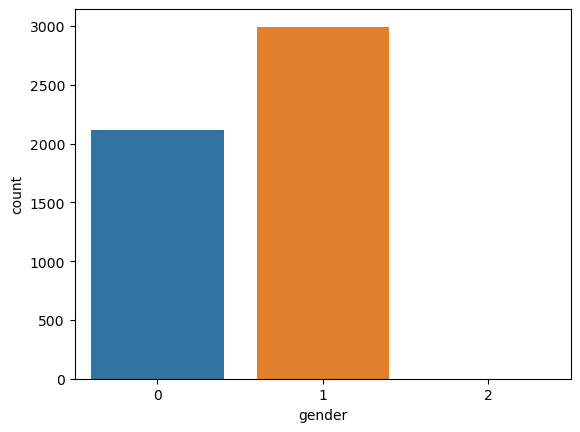

In [46]:

#Visulaizing the data
sns.countplot(x = 'gender', data = df)

<Axes: xlabel='Residence_type', ylabel='count'>

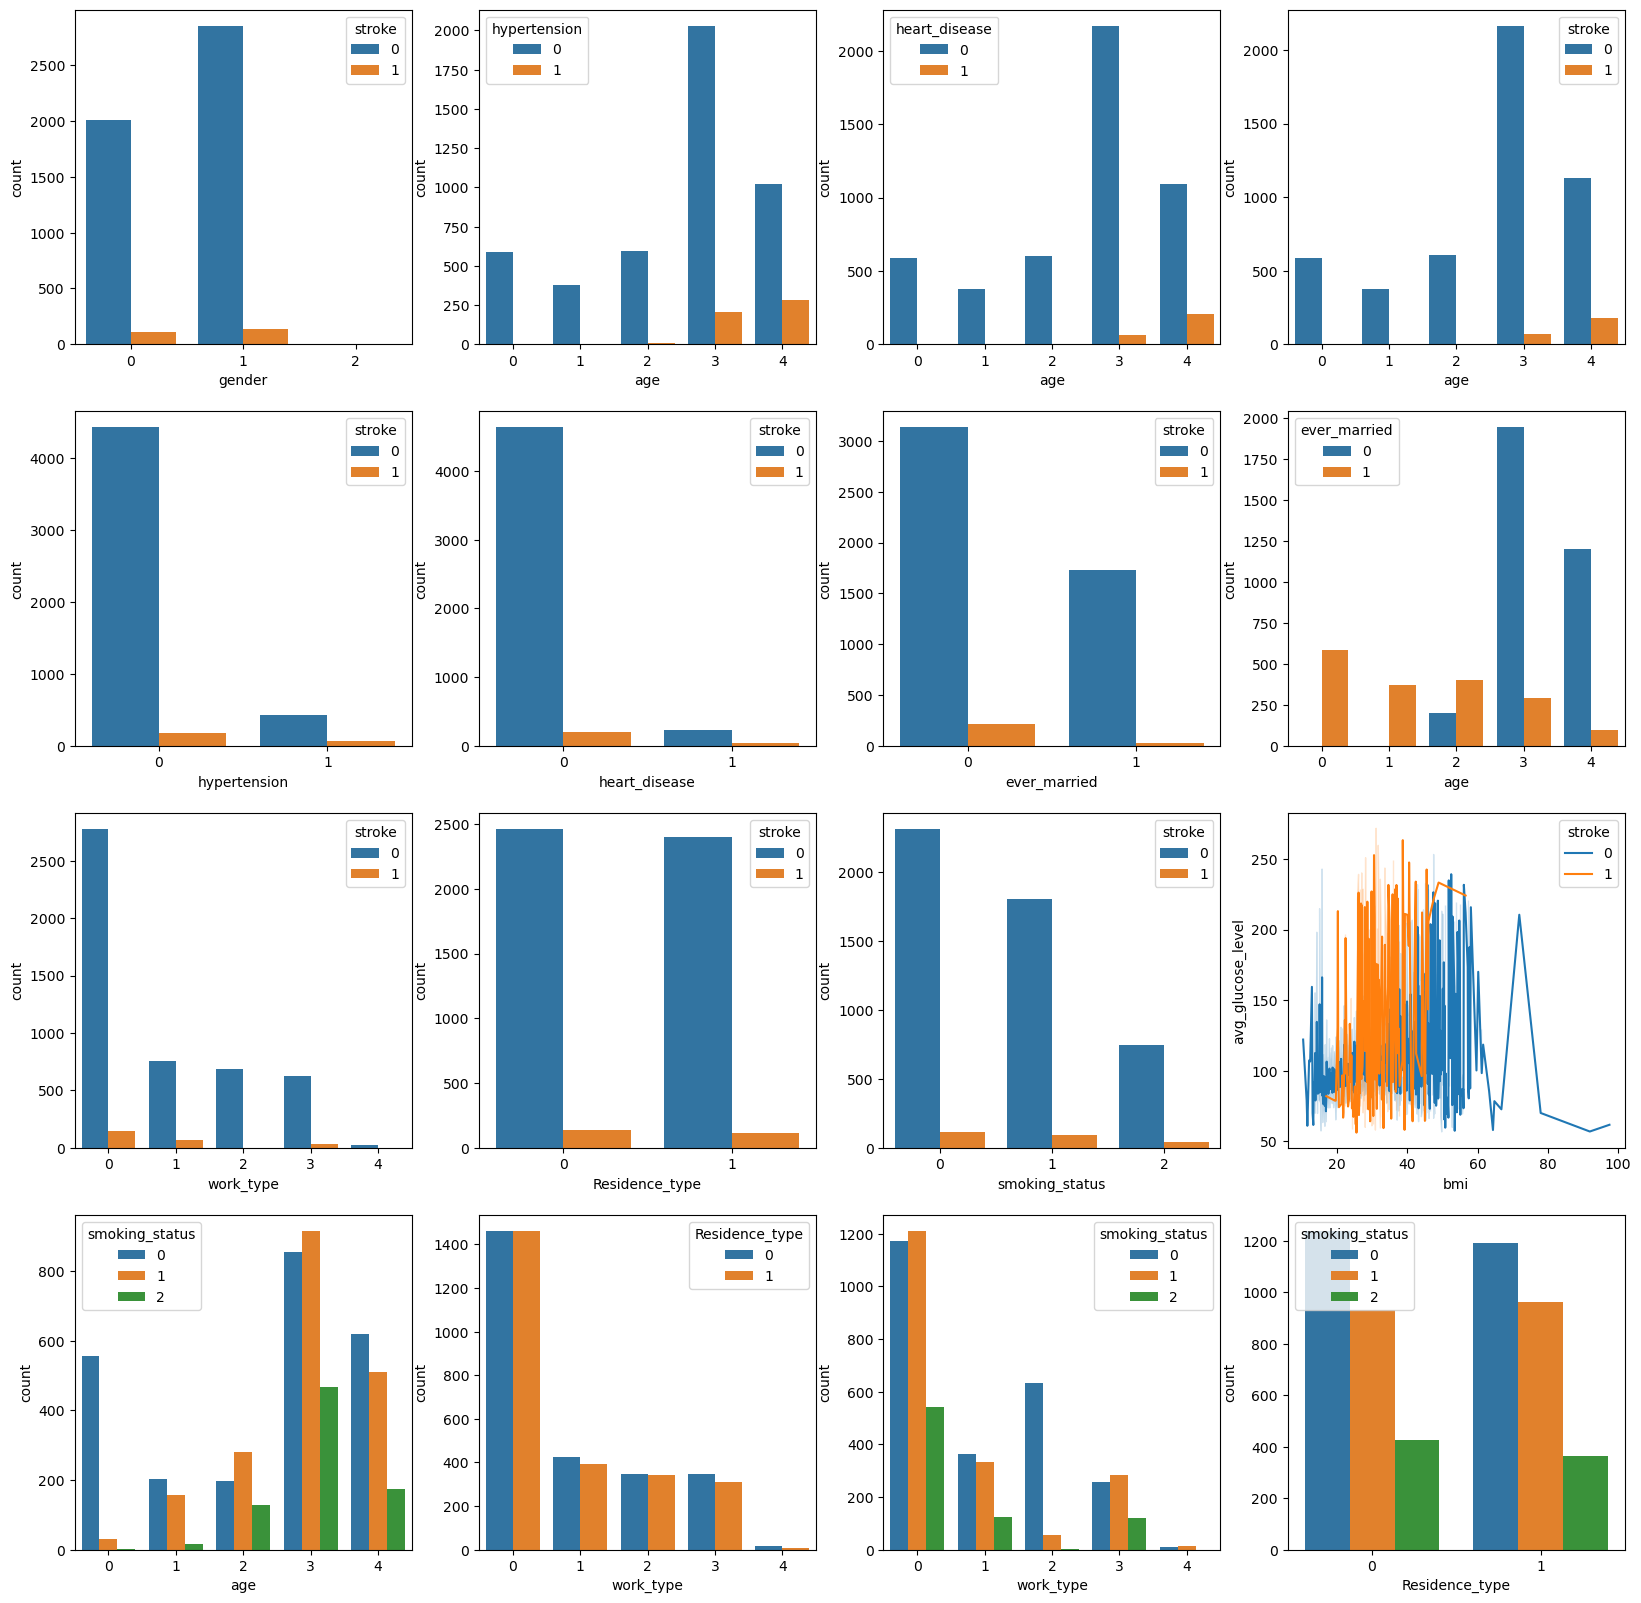

In [48]:

fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = df,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = df,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = df,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = df,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = df,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])